# LISC
This notebook demonstrates the use of "[LISC](https://lisc-tools.github.io/lisc/index.html)" (Literature Scanner) developed by Tom Donoghue (Voytek Lab, UC San Diego).

Here, we'll use it to assess the overlap of specific brain waves with various behaviors or conditions.

In [1]:
# Import all of the lisc tools
from lisc import *

# Install necessary packages (uncomment if you need these)
# %pip install wordcloud
# %pip install nltk

Now we'll set up some terms for LISC to search for. We'll then add these to our list, and ask LISC to determine how many documents and co-occurences there are.

In [2]:
# Set up some terms to search for
bandwidths = [['alpha waves'], ['beta waves'], ['high gamma waves'], ['theta waves']]
behaviors = [['epilepsy'], ['speech'], ['memory'], ['meditation']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts = Counts()
counts.add_terms(bandwidths, dim='A')
counts.add_terms(behaviors, dim='B')

# Collect co-occurrence data
counts.run_collection()

# Check how many articles were found for each search term
counts.check_counts()

The number of documents found for each search term is:
  'alpha waves'        -   314
  'beta waves'         -   162
  'high gamma waves'   -   223
  'theta waves'        -   391


In [3]:
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'epilepsy'     -   106569
  'speech'       -    80262
  'memory'       -   248062
  'meditation'   -     4962


LISC has found our terms as well as the intersection of them:

In [4]:
# Look at the collected counts data for the first set of terms
counts.check_data(data_type='counts', dim='A')

For  'alpha waves'       the highest association is  'memory'      with          17
For  'beta waves'        the highest association is  'memory'      with           8
For  'high gamma waves'  the highest association is  'epilepsy'    with          18
For  'theta waves'       the highest association is  'memory'      with          37


In [5]:
# Look at the collected counts data for the second set of terms
counts.check_data(data_type='counts', dim='B')

For  'epilepsy'    the highest association is  'theta waves'       with          28
For  'speech'      the highest association is  'theta waves'       with           5
For  'memory'      the highest association is  'theta waves'       with          37
For  'meditation'  the highest association is  'alpha waves'       with           6


## Normalize the data
To normalize the data, we can divide the co-occurrence counts by the number of articles per term. This allows us the examine, for example, the proportion of articles that include particular co-occurrence patterns.

We can also calculate an association index or score. For example, the Jaccard index is a standard measure for measuring the similarity of samples, and is also available to compute and use.

In [6]:
# Compute a normalization of the co-occurrence data
counts.compute_score('normalize', dim='A')

# Compute the association index
counts.compute_score('association')

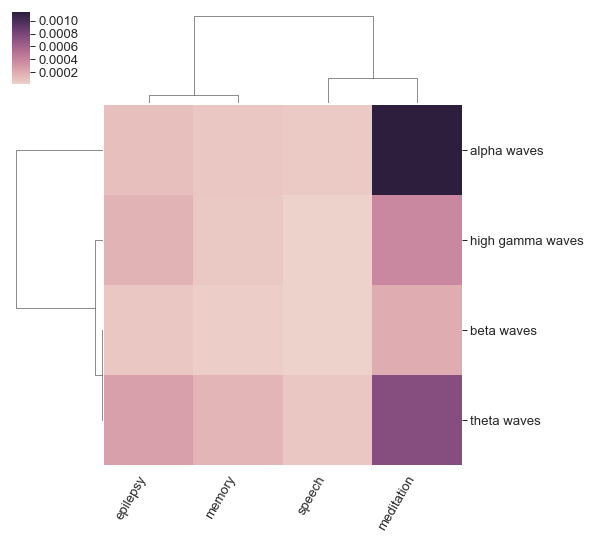

In [9]:
# Plot a clustermap of the association index data

from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

plot_clustermap(counts.score, counts.terms['B'].labels, counts.terms['A'].labels)

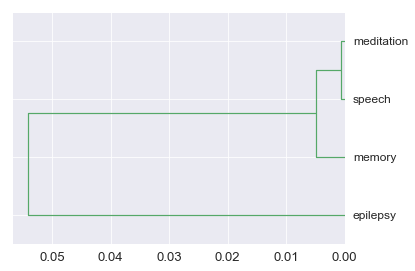

In [10]:
# Plot a dendrogram, to cluster the terms
plot_dendrogram(counts.score, counts.terms['B'].labels)

## Wordcloud

We can also visualize the words contained in all of the titles and abstracts that LISC found containing our search term(s).

In [11]:
# Initialize Words object and set the terms to search for
words = Words()
words.add_terms(['theta waves'])

# Collect words data
words.run_collection(usehistory=True, retmax='100')

# Check out the first 10 titles
print(words.results[0].titles[:10])

['Background Frequency Patterns in Standard Electroencephalography as an Early Prognostic Tool in Out-of-Hospital Cardiac Arrest Survivors Treated with Targeted Temperature Management.', 'Predictive Role of Electroencephalography in Regard to Neurological and Cognitive Sequelae After Acute Central Nervous System Infection.', 'Hippocampal oscillatory dynamics and sleep atonia are altered in an animal model of fibromyalgia: Implications in the search for biomarkers.', 'Oscillating circuitries in the sleeping brain.', 'EEG signals during mouth breathing in a working memory task.', 'Electroencephalographic slow wave dynamics and loss of behavioural responsiveness induced by ketamine in human volunteers.', 'The high-working load states induced by action real-time strategy gaming: An EEG power spectrum and network study.', 'Interictal coupling of HFOs and slow oscillations predicts the seizure-onset pattern in mesiotemporal lobe epilepsy.', 'Frontal theta activity and white matter plasticity

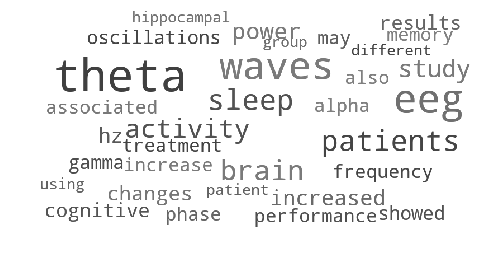

In [12]:
from lisc.data import Articles, ArticlesAll
from lisc.plts.words import plot_wordcloud

# Collect into list of aggregated data objects
all_articles = [ArticlesAll(words[label]) for label in words.labels]

# Plot a WordCloud of the collected data
plot_wordcloud(all_articles[0].words,50)